In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
# Pehle hum woh folder banayenge jo error mein likha hai
!mkdir -p /root/.config/kaggle/

# Ab upload ki hui file ko uss folder mein move karenge
!mv kaggle.json /root/.config/kaggle/

# Yeh zaroori hai: File permissions set karenge (taaki Kaggle ko lage ki file secure hai)
!chmod 600 /root/.config/kaggle/kaggle.json

In [3]:
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset

Dataset URL: https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset
License(s): other
 86% 681M/788M [00:03<00:02, 52.3MB/s]
100% 788M/788M [00:04<00:00, 206MB/s] 


In [ ]:
!unzip microsoft-catsvsdogs-dataset.zip

In [5]:
import os
import shutil
import random
from PIL import Image # Yeh library image check karne ke liye hai

print("Script shuru ho rahi hai...")

# --- Configuration ---
# 1. Hamara original data kahan hai
SOURCE_CAT_DIR = 'PetImages/Cat'
SOURCE_DOG_DIR = 'PetImages/Dog'

# 2. Hamein naya dataset kahan banana hai
BASE_DIR = 'dataset'

# 3. Train aur Validation folders ke naam
train_dir = os.path.join(BASE_DIR, 'train')
validation_dir = os.path.join(BASE_DIR, 'validation')
test_dir = os.path.join(BASE_DIR, 'test')

# 4. Unke andar Cat/Dog folders ke naam
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 5. Kitna data validation mein daalna hai (20%) 
SPLIT_SIZE_VALID = 0.2
# 5. Kitna data test mein daalna hai (10%)
SPLIT_SIZE_TEST = 0.1

# --- Function 1: Naye Folders Banana ---
def create_dirs():
    print("Naye folders bana raha hoon...")
    os.makedirs(train_cats_dir, exist_ok=True)
    os.makedirs(train_dogs_dir, exist_ok=True)
    os.makedirs(validation_cats_dir, exist_ok=True)
    os.makedirs(validation_dogs_dir, exist_ok=True)
    os.makedirs(test_cats_dir, exist_ok=True)
    os.makedirs(test_dogs_dir, exist_ok=True)
    print("Folders ban gaye.")

# --- Function 2: Data ko Split aur Copy Karna ---
def split_and_copy_data(source_dir, train_target_dir, valid_target_dir,test_target_dir, split_size_valid,split_size_test):
    all_files = []

    # Pehle saari valid files ki list banayenge
    print(f"'{source_dir}' ko scan kar raha hoon...")
    for filename in os.listdir(source_dir):
        filepath = os.path.join(source_dir, filename)

        # Check karo ki file empty toh nahi hai
        if os.path.getsize(filepath) > 0:
            # Check karo ki file sach mein image hai ya nahi
            try:
                # Image ko kholne ki koshish karo
                img = Image.open(filepath)
                img.verify() # Check karo ki image data corrupt toh nahi
                all_files.append(filename)
            except (IOError, SyntaxError) as e:
                # Yeh kharaab file hai, ise skip karo
                print(f"Kharaab file mili, skip kar raha hoon: {filename}")
        else:
            print(f"Empty file mili, skip kar raha hoon: {filename}")

    # List ko shuffle karo taaki random images train/validation mein jaayein
    random.shuffle(all_files)

    # Split point calculate karo
    split_point_valid = int(len(all_files) * (1 - split_size_valid - split_size_test))
    split_point_test = int(len(all_files) * (1 - split_size_test))

    # List ko do hisson mein todo
    train_files = all_files[:split_point_valid]
    validation_files = all_files[split_point_valid:split_point_test]
    test_files=all_files[split_point_test:]

    # Files ko copy karo
    print(f"Train files copy kar raha hoon -> {train_target_dir}")
    for filename in train_files:
        shutil.copyfile(os.path.join(source_dir, filename),
                        os.path.join(train_target_dir, filename))

    print(f"Validation files copy kar raha hoon -> {valid_target_dir}")
    for filename in validation_files:
        shutil.copyfile(os.path.join(source_dir, filename),
                        os.path.join(valid_target_dir, filename))
        
    for filename in test_files:
        shutil.copyfile(os.path.join(source_dir, filename),
                        os.path.join(test_target_dir, filename))

    print(f"Total {len(all_files)} files process huin.")
    print(f"Training mein gayi: {len(train_files)},test mein gayi: {len(test_files)}, Validation mein gayi: {len(validation_files)}")


create_dirs()

print("\n--- Cat Files ko Process kar raha hoon ---")
split_and_copy_data(SOURCE_CAT_DIR, train_cats_dir, validation_cats_dir,test_cats_dir, SPLIT_SIZE_VALID,SPLIT_SIZE_TEST)

print("\n--- Dog Files ko Process kar raha hoon ---")
split_and_copy_data(SOURCE_DOG_DIR, train_dogs_dir, validation_dogs_dir,test_dogs_dir, SPLIT_SIZE_VALID,SPLIT_SIZE_TEST)

print("\nSab ho gaya! Dataset taiyaar hai.")

Script shuru ho rahi hai...
Naye folders bana raha hoon...
Folders ban gaye.

--- Cat Files ko Process kar raha hoon ---
'PetImages/Cat' ko scan kar raha hoon...
Empty file mili, skip kar raha hoon: 666.jpg
Kharaab file mili, skip kar raha hoon: Thumbs.db
Train files copy kar raha hoon -> dataset/train/cats
Validation files copy kar raha hoon -> dataset/validation/cats
Total 12499 files process huin.
Training mein gayi: 9999, Validation mein gayi: 2500

--- Dog Files ko Process kar raha hoon ---
'PetImages/Dog' ko scan kar raha hoon...


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Empty file mili, skip kar raha hoon: 11702.jpg
Kharaab file mili, skip kar raha hoon: Thumbs.db
Train files copy kar raha hoon -> dataset/train/dogs
Validation files copy kar raha hoon -> dataset/validation/dogs
Total 12499 files process huin.
Training mein gayi: 9999, Validation mein gayi: 2500

Sab ho gaya! Dataset taiyaar hai.


##Loading data for training and testing



In [6]:
img_height, img_width = 150, 150
batch_size=32

In [7]:
train_data_source='/content/dataset/train'
valid_data_source='/content/dataset/validation'

In [8]:
train_datagen=ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  zoom_range=0.2,
  shear_range=0.2,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

valid_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
training_data_generator=train_datagen.flow_from_directory(
    train_data_source,
    batch_size=batch_size,
    target_size=(img_height,img_width),
    class_mode='binary'
)

Found 19998 images belonging to 2 classes.


In [10]:
valid_data_generator=valid_datagen.flow_from_directory(
    valid_data_source,
    batch_size=batch_size,
    target_size=(img_height,img_width),
    class_mode='binary'
)

Found 5000 images belonging to 2 classes.


In [11]:
print(f'class {training_data_generator.class_indices}')

class {'cats': 0, 'dogs': 1}


###CNN Architecture

In [12]:
model=Sequential()

In [13]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_height, img_width,3)))
model.add(MaxPooling2D((2,2),2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2),2))

In [15]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [18]:
history=model.fit(
    training_data_generator,
    steps_per_epoch=training_data_generator.samples//batch_size,
    epochs=30,
    validation_data=valid_data_generator,
    validation_steps=valid_data_generator.samples//batch_size,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 153s 234ms/step - accuracy: 0.5275 - loss: 0.6869 - val_accuracy: 0.5467 - val_loss: 0.6928
Epoch 2/30
  1/624 ━━━━━━━━━━━━━━━━━━━━ 22s 37ms/step - accuracy: 0.5312 - loss: 0.6906

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.5312 - loss: 0.6906 - val_accuracy: 0.5563 - val_loss: 0.6723
Epoch 3/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 139s 223ms/step - accuracy: 0.6226 - loss: 0.6428 - val_accuracy: 0.6587 - val_loss: 0.6267
Epoch 4/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6562 - loss: 0.5814 - val_accuracy: 0.6743 - val_loss: 0.6110
Epoch 5/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - accuracy: 0.6879 - loss: 0.5926 - val_accuracy: 0.7059 - val_loss: 0.5973
Epoch 6/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6250 - loss: 0.7127 - val_accuracy: 0.7151 - val_loss: 0.5752
Epoch 7/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.7119 - loss: 0.5598 - val_accuracy: 0.7774 - val_loss: 0.4786
Epoch 8/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8125 - loss: 0.4111 - val_accuracy: 0.7744 - val_loss: 0.4811
Epoch 9/30
624/624 ━━━━━━━━━━━━━━━━━━━━ 202s 323ms/step - accuracy: 0.7288 - loss: 0.5348 - val_ac

In [20]:
model.save('cats_vs_dogs_v1.keras')

In [22]:
from tensorflow.keras.preprocessing import image

In [23]:
img=image.load_img('/content/Screenshot 2025-10-25 214212.png',target_size=(img_height,img_width))

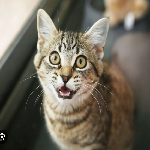

In [24]:
img

In [25]:
img_array=image.img_to_array(img)

In [26]:
img_array = np.expand_dims(img_array, axis=0)

In [27]:
img_array = img_array / 255.0

In [28]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [29]:
print("\n--- Result ---")
print(f"Raw Prediction (0 = Cat, 1 = Dog): {prediction[0][0]:.4f}")

if prediction[0][0] > 0.5:
    # 0.5 se bada matlab 1 (Dog) ke zyada kareeb
    print("Faisla: Yeh ek KUTTA (DOG) hai!")
else:
    # 0.5 se chhota matlab 0 (Cat) ke zyada kareeb
    print("Faisla: Yeh ek BILLI (CAT) hai!")


--- Result ---
Raw Prediction (0 = Cat, 1 = Dog): 0.0004
Faisla: Yeh ek BILLI (CAT) hai!


In [30]:
img=image.load_img('/content/Screenshot 2025-10-25 214846.png',target_size=(img_height,img_width))

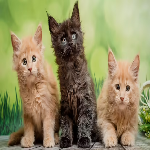

In [31]:
img

In [32]:
img_array=image.img_to_array(img)

In [33]:
img_array = np.expand_dims(img_array, axis=0)

In [34]:
img_array = img_array / 255.0

In [35]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [36]:
print("\n--- Result ---")
print(f"Raw Prediction (0 = Cat, 1 = Dog): {prediction[0][0]:.4f}")

if prediction[0][0] > 0.5:
    # 0.5 se bada matlab 1 (Dog) ke zyada kareeb
    print("Faisla: Yeh ek KUTTA (DOG) hai!")
else:
    # 0.5 se chhota matlab 0 (Cat) ke zyada kareeb
    print("Faisla: Yeh ek BILLI (CAT) hai!")


--- Result ---
Raw Prediction (0 = Cat, 1 = Dog): 0.1312
Faisla: Yeh ek BILLI (CAT) hai!


In [37]:
img=image.load_img('/content/dog.png',target_size=(img_height,img_width))

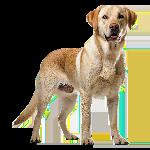

In [38]:
img

In [39]:
img_array=image.img_to_array(img)

In [40]:
img_array = np.expand_dims(img_array, axis=0)

In [41]:
img_array = img_array / 255.0

In [42]:
prediction = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [43]:
print("\n--- Result ---")
print(f"Raw Prediction (0 = Cat, 1 = Dog): {prediction[0][0]:.4f}")

if prediction[0][0] > 0.5:
    # 0.5 se bada matlab 1 (Dog) ke zyada kareeb
    print("Faisla: Yeh ek KUTTA (DOG) hai!")
else:
    # 0.5 se chhota matlab 0 (Cat) ke zyada kareeb
    print("Faisla: Yeh ek BILLI (CAT) hai!")


--- Result ---
Raw Prediction (0 = Cat, 1 = Dog): 0.9990
Faisla: Yeh ek KUTTA (DOG) hai!
